## Trabajo Práctico n°3

### Importamos librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cargamos el dataset

In [2]:
PATH = 'review_keywords_topics.csv'
df = pd.read_csv(PATH)

In [3]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,stars,comment,book_url,NER,NOUNS,NOUN_CHUNKS,SENTENCES,SENTIMENT,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,Representation,Representative_Docs
0,0,0,POS,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130,"['phd', 'ga', 'year ago', 'sci']","['outset', 'respect', 'author', 'attack', 'phd...","[outset review respect author sheer guile, att...",2,POS,"['engineering', 'programming', 'topic']",-1,8041,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
1,1,1,NEG,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130,[],"['capitalism', 'read', 'book', 'bookstore', 'r...","[capitalism good read book, nearby bookstore, ...",2,POS,"['capitalism', 'bookstore', 'amazon']",75,50,75_textbook_price_sentence_author,"['textbook', 'price', 'sentence', 'author', 'w...",['worth money reasons writing book barely acce...
2,2,2,POS,look start datum science confused material use...,https://www.amazon.com/dp/1492041130,[],"['science', 'material', 'use', 'video', 'book'...",[datum science confused material use video boo...,1,POS,"['educational', 'educate', 'resource']",13,133,13_science_datum_field_indy,"['science', 'datum', 'field', 'indy', 'scienti...","['good introduction datum science', 'learn fas..."
3,3,3,POS,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130,['phd'],"['book', 'variety', 'topic', 'detail', 'reader...","[general good book, wide variety topic, detail...",2,NEU,"['book', 'reader', 'subject']",-1,8041,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
4,4,4,POS,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130,"['decade', 'coin love', 'sas s r']","['datum', 'scientist', 'decade', 'term', 'coin...",[academic datum scientist decade term coin lov...,1,POS,"['python', 'programming', 'datum']",-1,8041,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
5,5,5,POS,book nice approach cover basic statistic encou...,https://www.amazon.com/dp/1492041130,[],"['book', 'approach', 'statistic', 'encounter',...","[book nice approach, basic statistic encounter...",1,POS,"['statistic', 'programming', 'introductory']",0,388,0_statistic_stat_statistical_statistics,"['statistic', 'stat', 'statistical', 'statisti...",['book happen understand statistic deep fundam...
6,6,6,POS,important data science book readpick alongside...,https://www.amazon.com/dp/1492041130,[],"['science', 'book', 'course', 'information', '...","[important data science book, expensive course...",1,NEU,"['book', 'data', 'chapterbookgreat']",10,158,10_data_science_beginner_scientist,"['data', 'science', 'beginner', 'scientist', '...","['great book recommend data science field', 'g..."
7,7,7,POS,book suitable people basic python programming ...,https://www.amazon.com/dp/1492041130,[],"['book', 'people', 'python', 'programming', 's...","[book suitable people, basic python programmin...",1,POS,"['programming', 'python', 'beginner']",-1,8041,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
8,8,8,NEG,specifically probability notation mess varie p...,https://www.amazon.com/dp/1492041130,[],"['probability', 'notation', 'mess', 'point', '...","[specifically probability notation mess, varie...",1,NEU,"['notation', 'introduction', 'size']",169,23,169_probability_prerequite_intuititive_booknew,"['probability', 'prerequite', 'intuititive', '...",['want introduction information theory way pro...
9,9,9,POS,book data science great fundamental book surve...,https://www.amazon.com/dp/1492041130,[],"['book', 'data', 'book', 'survey', 'material',...",[book data science great fundamental book surv...,1,POS,"['python', 'data', 'coder']",15

In [4]:
columns= ["Unnamed: 0.1",	"Unnamed: 0"]
df.drop(columns=columns,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20647 entries, 0 to 20646
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   stars                20647 non-null  object
 1   comment              20623 non-null  object
 2   book_url             20647 non-null  object
 3   NER                  20647 non-null  object
 4   NOUNS                20647 non-null  object
 5   NOUN_CHUNKS          20647 non-null  object
 6   SENTENCES            20647 non-null  int64 
 7   SENTIMENT            20647 non-null  object
 8   KEYWORDS             20647 non-null  object
 9   TOPIC_ID             20647 non-null  int64 
 10  TOPIC_POPULARITY     20647 non-null  int64 
 11  TOPIC_NAME           20647 non-null  object
 12  Representation       20647 non-null  object
 13  Representative_Docs  20647 non-null  object
dtypes: int64(3), object(11)
memory usage: 2.2+ MB


### Exploramos las keywords y su asociación a cada sentimiento

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

### Dividimos los string de la columna "KEYWORDS" en palabras clave individuales

In [7]:
df['KEYWORDS'] = df['KEYWORDS'].str.strip('[]').str.replace("'", "").str.split(', ')

In [8]:
palabras_clave = [palabra for palabras_lista in df['KEYWORDS'] for palabra in palabras_lista]

### Filtramos las reseñas por sentimiento

In [9]:
recomendaciones_positivas = df[df['SENTIMENT'] == 'POS']
recomendaciones_neutras = df[df['SENTIMENT'] == 'NEU']
recomendaciones_negativas = df[df['SENTIMENT'] == 'NEG']

In [11]:
keywords_positivas = [keyword for keywords_list in recomendaciones_positivas['KEYWORDS'] for keyword in keywords_list]
keywords_neutras = [keyword for keywords_list in recomendaciones_neutras['KEYWORDS'] for keyword in keywords_list]
keywords_negativas = [keyword for keywords_list in recomendaciones_negativas['KEYWORDS'] for keyword in keywords_list]

In [12]:
frecuencia_positivas = Counter(keywords_positivas)
frecuencia_neutras = Counter(keywords_neutras)
frecuencia_negativas = Counter(keywords_negativas)

In [13]:
num_palabras_clave_comunes = 10 

In [14]:
palabras_clave_positivas_comunes = frecuencia_positivas.most_common(num_palabras_clave_comunes)
palabras_clave_neutras_comunes = frecuencia_neutras.most_common(num_palabras_clave_comunes)
palabras_clave_negativas_comunes = frecuencia_negativas.most_common(num_palabras_clave_comunes)

In [15]:
palabras_positivas = [x[0] for x in palabras_clave_positivas_comunes]
frecuencias_positivas = [x[1] for x in palabras_clave_positivas_comunes]

palabras_neutras = [x[0] for x in palabras_clave_neutras_comunes]
frecuencias_neutras = [x[1] for x in palabras_clave_neutras_comunes]

palabras_negativas = [x[0] for x in palabras_clave_negativas_comunes]
frecuencias_negativas = [x[1] for x in palabras_clave_negativas_comunes]

### Graficamos las palabras clave más comunes en cada sentimiento

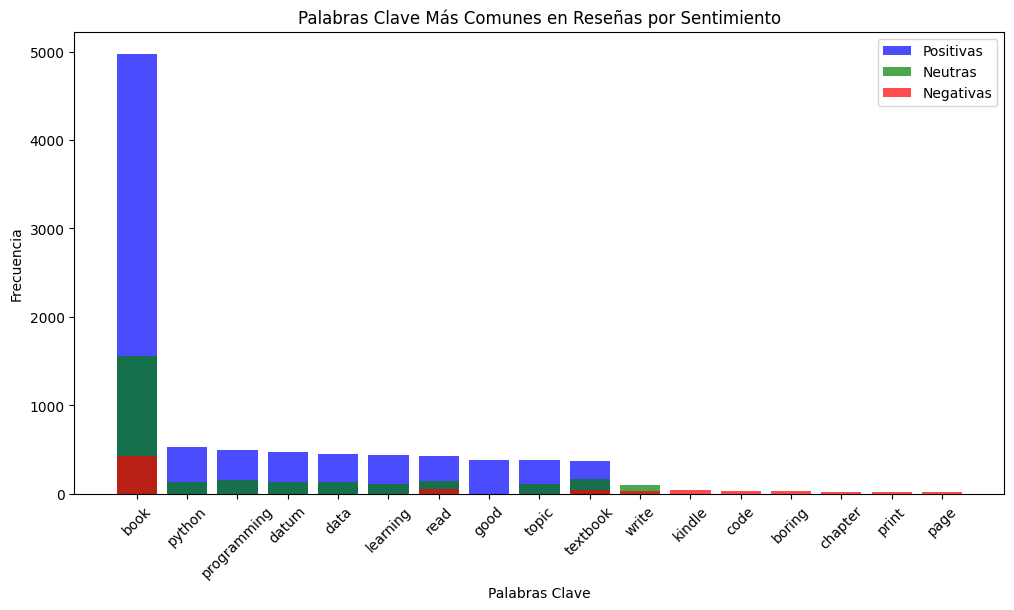

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(palabras_positivas, frecuencias_positivas, color='b', alpha=0.7, label='Positivas')
plt.bar(palabras_neutras, frecuencias_neutras, color='g', alpha=0.7, label='Neutras')
plt.bar(palabras_negativas, frecuencias_negativas, color='r', alpha=0.7, label='Negativas')
plt.xlabel('Palabras Clave')
plt.ylabel('Frecuencia')
plt.title('Palabras Clave Más Comunes en Reseñas por Sentimiento')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Realizamos wordclouds de keywords por sentimiento

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
sentimientos = df['SENTIMENT'].unique()
wordclouds = {}

In [19]:
for sentimiento in sentimientos:
    palabras_clave = df[df['SENTIMENT'] == sentimiento]['KEYWORDS'].explode().dropna().tolist()
    palabras_clave = ' '.join(palabras_clave)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(palabras_clave)
    wordclouds[sentimiento] = wordcloud

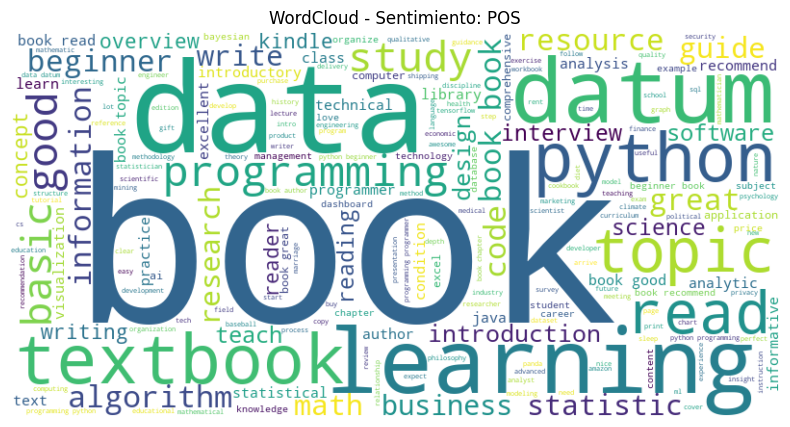

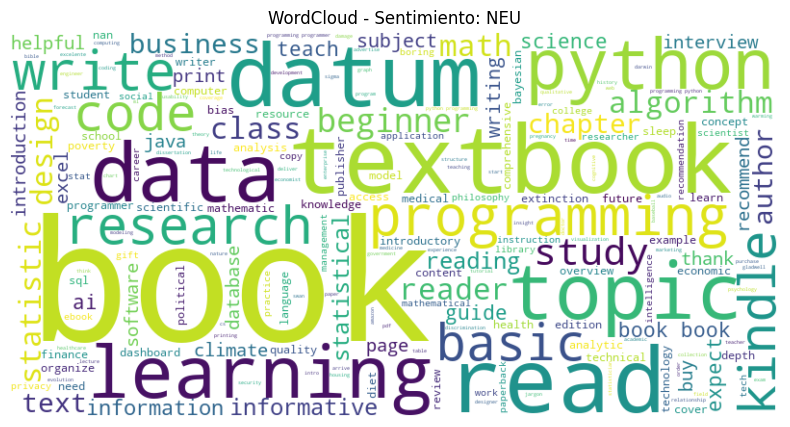

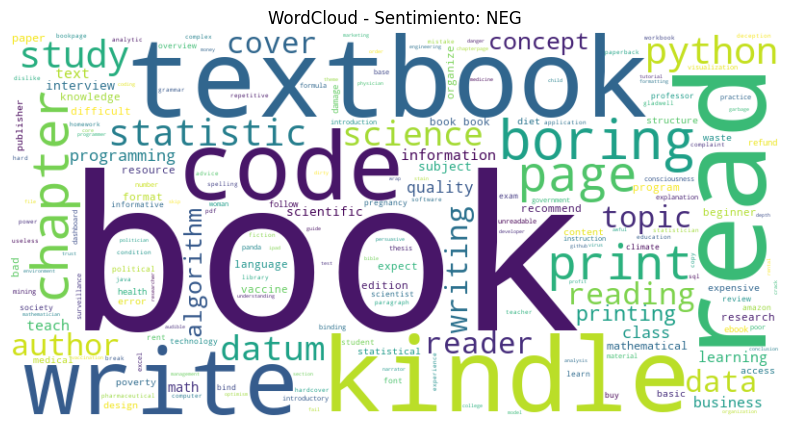

In [20]:
for sentimiento, wordcloud in wordclouds.items():
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - Sentimiento: {sentimiento}')
    plt.show()

### Identificamos los tópicos asociados a cada sentimiento

In [21]:
df["TOPIC_NAME"].nunique()

262

In [22]:
df["TOPIC_NAME"].unique()

array(['-1_book_datum_read_author', '75_textbook_price_sentence_author',
       '13_science_datum_field_indy',
       '0_statistic_stat_statistical_statistics',
       '10_data_science_beginner_scientist',
       '169_probability_prerequite_intuititive_booknew',
       '155_python_data_mongodb_beginner',
       '214_machine_python_learning_editionappreciate',
       '207_machine_learning_recap_remembereffort',
       '91_price_worth_expensive_reasonable',
       '12_code_java_structure_example',
       '94_pandas_panda_numpy_matplotlib',
       '7_print_printing_quality_page',
       '132_python_broadcasting_tuple_numpy',
       '159_overview_moderately_informed_explained',
       '125_informative_incidentally_information_informationmediocre',
       '2_datum_data_model_filler',
       '38_analytic_business_analytics_analytical',
       '167_thoroughfinish_enlighteningtime_hayes_enjoyable',
       '93_computation_sipser_theory_automata',
       '39_fiction_read_interesting_point',
    

In [23]:
df["TOPIC_NAME"].value_counts(normalize=True)

TOPIC_NAME
-1_book_datum_read_author                                                                                                                                                                                                                                      0.389451
0_statistic_stat_statistical_statistics                                                                                                                                                                                                                        0.018792
1_python_programming_beginner_language                                                                                                                                                                                                                         0.018017
2_datum_data_model_filler                                                                                                                                                                            

### Calculamos los 3 topic_name más frecuentes en el dataset y vemos que proporción de reseñas positivas, negativas o neutras poseen

In [24]:
topic_names_mas_frecuentes = df['TOPIC_NAME'].value_counts().nlargest(3).index.tolist()

In [25]:
proporciones_por_sentimiento = []

In [26]:
for topic_name in topic_names_mas_frecuentes:
    proporciones = round(df[df['TOPIC_NAME'] == topic_name].groupby('SENTIMENT').size() / len(df),4)
    proporciones_por_sentimiento.append(proporciones)

In [27]:
print("Los 3 Topic Names Más Frecuentes en el DataFrame:")
print(topic_names_mas_frecuentes)
print("\nProporciones de los 3 Topic Names Más Frecuentes por Sentimiento:")
for i, topic_name in enumerate(topic_names_mas_frecuentes):
    print(f"Topic Name: {topic_name}")
    print(proporciones_por_sentimiento[i])
    print()

Los 3 Topic Names Más Frecuentes en el DataFrame:
['-1_book_datum_read_author', '0_statistic_stat_statistical_statistics', '1_python_programming_beginner_language']

Proporciones de los 3 Topic Names Más Frecuentes por Sentimiento:
Topic Name: -1_book_datum_read_author
SENTIMENT
NEG    0.0259
NEU    0.1052
POS    0.2583
dtype: float64

Topic Name: 0_statistic_stat_statistical_statistics
SENTIMENT
NEG    0.0016
NEU    0.0046
POS    0.0126
dtype: float64

Topic Name: 1_python_programming_beginner_language
SENTIMENT
NEG    0.0006
NEU    0.0041
POS    0.0133
dtype: float64



In [28]:
df[["TOPIC_NAME","Representation","Representative_Docs"]]

,TOPIC_NAME,Representation,Representative_Docs
0,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
1,75_textbook_price_sentence_author,"['textbook', 'price', 'sentence', 'author', 'w...",['worth money reasons writing book barely acce...
2,13_science_datum_field_indy,"['science', 'datum', 'field', 'indy', 'scienti...","['good introduction datum science', 'learn fas..."
3,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
4,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
...,...,...,...
20642,124_typo_grammar_spelling_error,"['typo', 'grammar', 'spelling', 'error', 'mist...",['read book time typo error definitely recomme...
20643,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
20644,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
20645,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...


In [30]:
df[["TOPIC_NAME"]].value_counts().nlargest(10)

TOPIC_NAME                                   
-1_book_datum_read_author                        8041
0_statistic_stat_statistical_statistics           388
1_python_programming_beginner_language            372
2_datum_data_model_filler                         343
3_algorithm_structure_algorithms_java             291
5_climate_warming_shellenberger_environmental     186
4_visualization_graph_tufte_chart                 186
6_kindle_version_format_equation                  176
7_print_printing_quality_page                     173
8_diet_greger_eat_food                            164
Name: count, dtype: int64